In [39]:
!pip install import_ipynb

In [40]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [41]:
%cd drive/My\ Drive/Colab\ Notebooks/predict_SAL

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/predict_SAL'
/content/drive/My Drive/Colab Notebooks/predict_SAL


In [42]:
import import_ipynb
!pwd

/content/drive/My Drive/Colab Notebooks/predict_SAL


In [43]:
import matplotlib.pyplot as plt

In [44]:
from preprocessing import salary_old_df, salary_new_df

In [62]:
from sklearn import linear_model        #모델 학습
from sklearn.metrics import mean_squared_error
from math import sqrt

x_train = salary_old_df[salary_old_df.columns.difference(['이름', 'y'])]
y_train = salary_old_df['y']

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)


print(model.score(x_train, y_train))
y_rmse = lr.predict(x_train)
print(sqrt(mean_squared_error(y_train,y_rmse)))

0.7097604514566315
33.58018781822431


In [74]:
from xgboost import XGBClassifier 
from xgboost import plot_importance 

x_train = salary_old_df[salary_old_df.columns.difference(['이름', 'y'])] 
y_train = salary_old_df['y']
y_train = y_train.astype('int')
xgb = XGBClassifier()
xgbmodel = xgb.fit(x_train, y_train)

print(xgbmodel.score(x_train, y_train))
y_rmse = xgb.predict(x_train)
print(sqrt(mean_squared_error(y_train,y_rmse)))

0.9253731343283582
18.124980699938256


In [75]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')

svr = svr.fit(x_train, y_train)
print(svr.score(x_train, y_train))
y_rmse = svr.predict(x_train)
print(sqrt(mean_squared_error(y_train,y_rmse)))

0.6042681494863247
39.117238349992924


In [63]:
x_test = salary_new_df[salary_old_df.columns.difference(['이름', 'y'])]
y_test = salary_new_df['y']


In [70]:
import lightgbm as lgb

train_ds = lgb.Dataset(x_train, label = y_train)
test_ds = lgb.Dataset(x_test, label=y_test)
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2020}
lgb_model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2013.83
[200]	valid_0's l2: 1707.08
[300]	valid_0's l2: 1634.94
[400]	valid_0's l2: 1640.07
Early stopping, best iteration is:
[330]	valid_0's l2: 1612.58


In [65]:
predict_train = lgb_model.predict(x_train)
predict_test = lgb_model.predict(x_test)

In [66]:
print(sqrt(mean_squared_error(y_train,predict_train)))
print(sqrt(mean_squared_error(y_test,predict_test)))

37.53875815678995
40.15693372129208


In [76]:
y_predict_lr = lr.predict(x_test)
y_predict_svr = svr.predict(x_test)
y_predict_xgb = xgb.predict(x_test)
y_predict_lgb = predict_test

In [77]:
print(sqrt(mean_squared_error(y_test,y_predict_lr)))
print(sqrt(mean_squared_error(y_test,y_predict_svr)))
print(sqrt(mean_squared_error(y_test,y_predict_xgb)))
print(sqrt(mean_squared_error(y_test,y_predict_lgb)))

48.85982312502511
42.26678230843703
54.43231579438565
40.15693372129208


In [67]:
result_df = salary_new_df[['이름', 'y']]
result_df['predict_lr'] = y_predict_lr
result_df['predict_xgb'] = y_predict_xgb
result_df['predict_svr'] = y_predict_svr
result_df['predict_lgb'] = predict_test
result_df.columns = ['이름', '실제상승률', '예측상승률', '예측상승률2','예측상승률3', '예측상승률4']


In [68]:
result_df.to_csv("1.csv")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


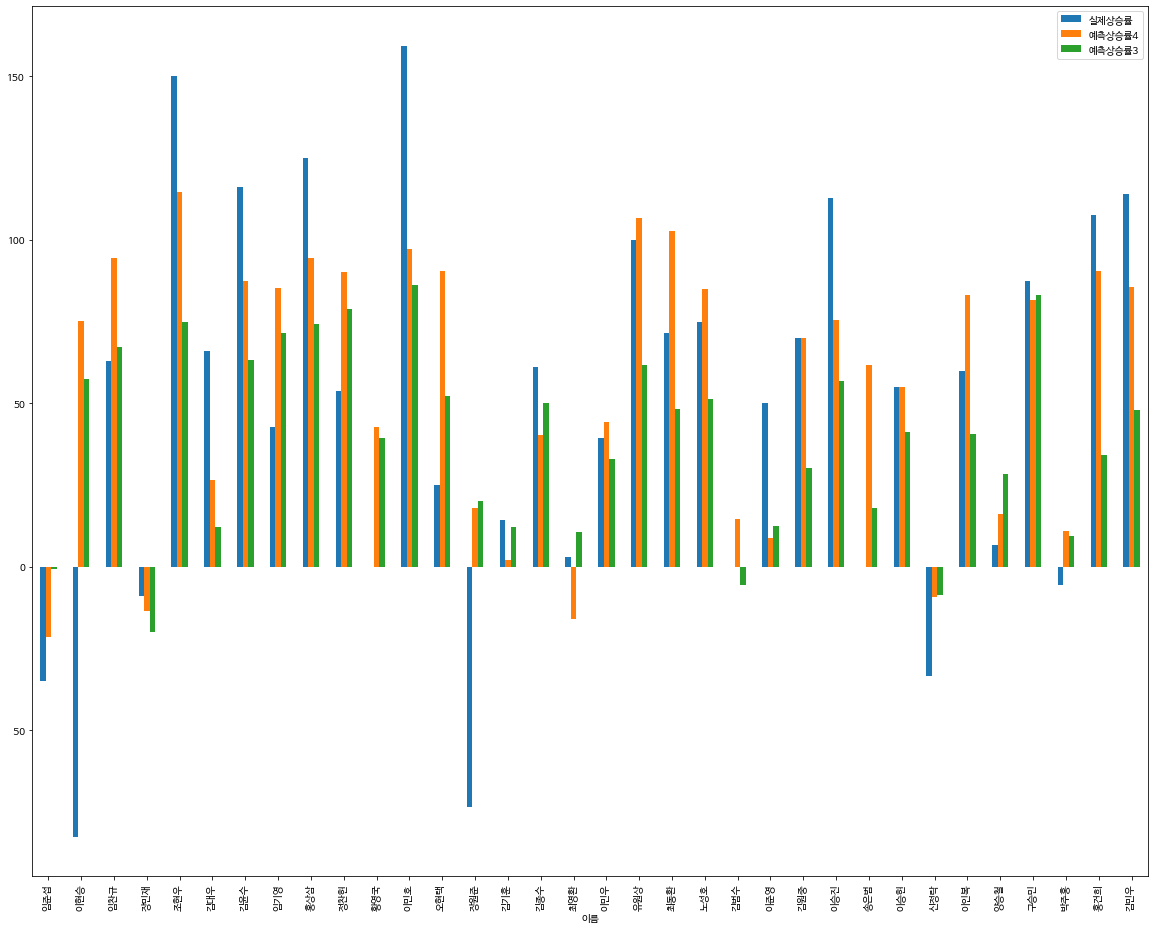

In [69]:
result_df = result_df.loc[100:200,:]
plt.rc('font', family='NanumBarunGothic') 
result_df.plot(x='이름', y=['실제상승률', '예측상승률4', '예측상승률3'], kind='bar')

In [55]:


#피처 선정 후



In [80]:
x_train = salary_old_df[['이닝', '자책', 'WPA', '세', '홀드', '홈런', '안타', '폭투']]    
y_train = salary_old_df['y']
x_test = salary_new_df[['이닝', '자책', 'WPA', '세', '홀드', '홈런', '안타', '폭투']]
y_test = salary_new_df['y']

lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)

print(model.score(x_train, y_train))
y_rmse = lr.predict(x_train)
print(sqrt(mean_squared_error(y_train,y_rmse)))

svr = SVR(kernel = 'linear')

svr = svr.fit(x_train, y_train)
print(svr.score(x_train, y_train))
y_rmse = svr.predict(x_train)
print(sqrt(mean_squared_error(y_train,y_rmse)))

train_ds = lgb.Dataset(x_train, label = y_train)
test_ds = lgb.Dataset(x_test, label=y_test)
params = {'learning_rate': 0.01, 
          'max_depth': 16, 
          'boosting': 'gbdt', 
          'objective': 'regression', 
          'metric': 'mse', 
          'is_training_metric': True, 
          'num_leaves': 144, 
          'feature_fraction': 0.9, 
          'bagging_fraction': 0.7, 
          'bagging_freq': 5, 
          'seed':2020}
lgb_model = lgb.train(params, train_ds, 1000, test_ds, verbose_eval=100, early_stopping_rounds=100)

y_rmse = lgb_model.predict(x_train)
print(sqrt(mean_squared_error(y_train,y_rmse)))

y_train = y_train.astype('int')
xgb = XGBClassifier()
xgbmodel = xgb.fit(x_train, y_train)

print(xgbmodel.score(x_train, y_train))
y_rmse = xgb.predict(x_train)
print(sqrt(mean_squared_error(y_train,y_rmse)))

0.6508019059276393
36.83331085588376
0.5320307281963002
42.63963657281569
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 2264.46
[200]	valid_0's l2: 1948.73
[300]	valid_0's l2: 1911.43
[400]	valid_0's l2: 1902.63
Early stopping, best iteration is:
[318]	valid_0's l2: 1881.1
40.49030038736611
0.753731343283582
42.61779111360636


In [82]:
y_predict_lr = lr.predict(x_test)
y_predict_svr = svr.predict(x_test)
y_predict_xgb = xgb.predict(x_test)
y_predict_lgb = lgb_model.predict(x_test)

In [89]:
print('Linear Regression 모델 RMSE : ', end ='')
print(sqrt(mean_squared_error(y_test,y_predict_lr)))
print('')
print('SV Regression 모델 RMSE : ', end ='')
print(sqrt(mean_squared_error(y_test,y_predict_svr)))
print('')
print('XGBoost 모델 RMSE : ', end ='')
print(sqrt(mean_squared_error(y_test,y_predict_xgb)))
print('')
print('LightGBM 모델 RMSE : ', end ='')
print(sqrt(mean_squared_error(y_test,y_predict_lgb)))

Linear Regression 모델 RMSE : 47.98488734513144

SV Regression 모델 RMSE : 44.53391323925372

XGBoost 모델 RMSE : 54.606959413964404

LightGBM 모델 RMSE : 43.37162768328211


In [90]:
result2_df = salary_new_df[['이름', 'y']]
result2_df['predict_lr'] = y_predict_lr
result2_df['predict_svr'] = y_predict_svr
result2_df['predict_xgb'] = y_predict_xgb
result2_df['predictlxgb'] = y_predict_lgb
result2_df.columns = ['이름', '실제상승률', '예측상승률_LR','예측상승률_SVR', '예측상승률_xgb', '예측상승률_lgb']


In [86]:
result2_df.to_csv("2.csv")

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


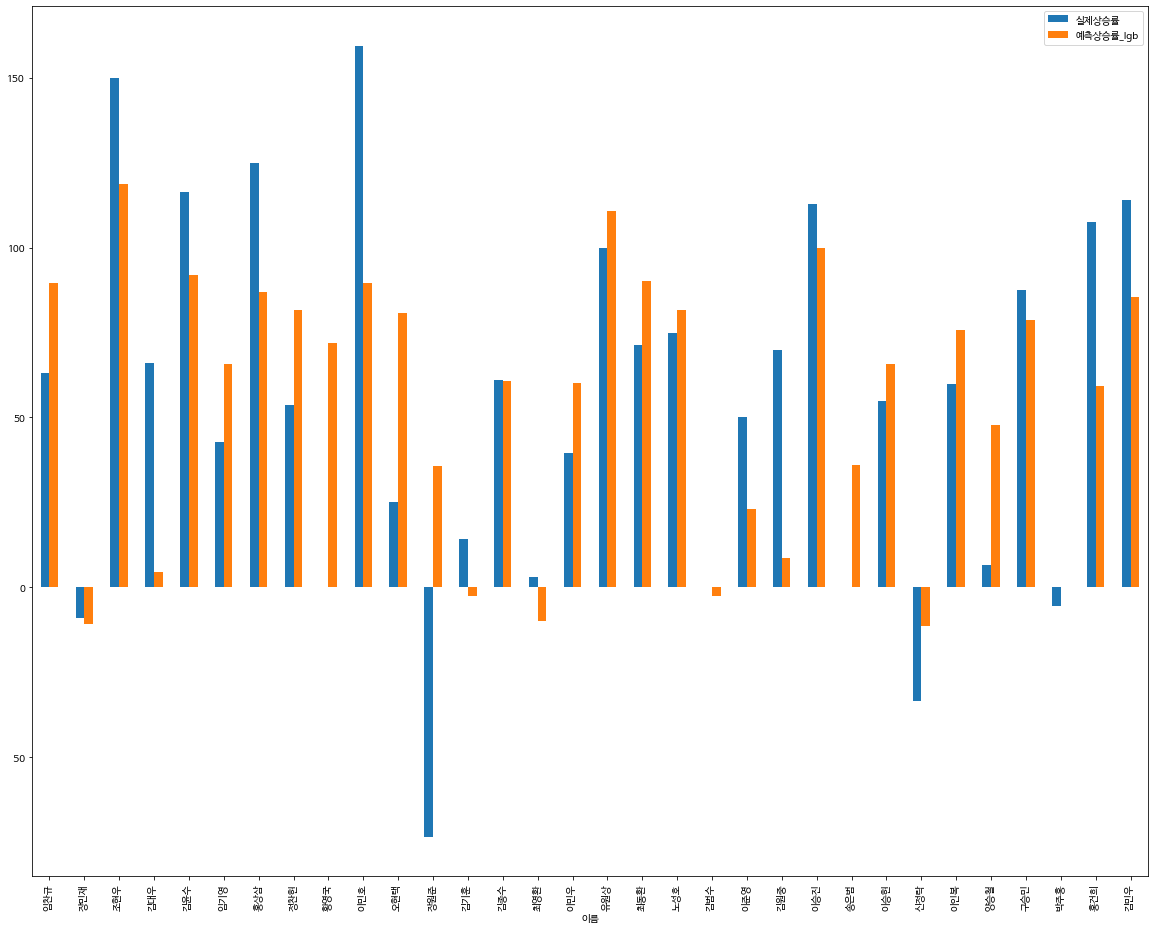

In [92]:
result2_df = result2_df.loc[105:,:]
plt.rc('font', family='NanumBarunGothic') 
result2_df.plot(x='이름', y=['실제상승률', '예측상승률_lgb'], kind='bar')